In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [291]:
data = pd.read_csv("C:/Users/ashle/OneDrive/Documents/Courses/UNC Courses/665 - Applied Stat II/2025_NBA_Project/nba_processed.csv")
data2025 = pd.read_csv("C:/Users/ashle/OneDrive/Documents/Courses/UNC Courses/665 - Applied Stat II/2025_NBA_Project/nba_playoffdata_2025.csv")

In [292]:
print(data.shape)
print(data2025.shape)

(656, 56)
(8, 51)


In [293]:
data.head()

,Year,Lower Seed,Higher Seed,Lower Seed Rk,Lower Seed MP,Lower Seed FG,Lower Seed FGA,Lower Seed FG%,Lower Seed 3P,Lower Seed 3PA,...,Higher Seed TOV,Higher Seed PF,Higher Seed PTS,Net Wins,Round_Eastern Conf First Round,Round_Eastern Conf Semifinals,Round_Finals,Round_Western Conf Finals,Round_Western Conf First Round,Round_Western Conf Semifinals
0,2024,1,8,2,241.8,43.9,90.2,0.487,16.5,42.5,...,12.7,17.3,110.1,3,True,False,False,False,False,False
1,2024,4,5,20,241.5,41.8,87.2,0.479,13.5,36.8,...,14.7,19.7,110.5,1,True,False,False,False,False,False
2,2024,3,6,4,241.5,43.1,88.5,0.487,14.2,38.1,...,12.9,21.4,123.3,-2,True,False,False,False,False,False
3,2024,2,7,19,240.6,41.3,88.7,0.465,13.2,35.8,...,12.0,20.3,114.6,2,True,False,False,False,False,False
4,2024,1,8,3,241.5,44.5,89.3,0.499,13.3,34.2,...,13.0,18.4,115.1,4,False,False,False,False,True,False


In [295]:
data2025

,Year,Round,Match,Winner Seed,Loser Seed,Winner Rk,Winner MP,Winner FG,Winner FGA,Winner FG%,...,Loser FT%,Loser ORB,Loser DRB,Loser TRB,Loser AST,Loser STL,Loser BLK,Loser TOV,Loser PF,Loser PTS
0,2025,Eastern Conf First Round,Indiana Pacers VS Milwaukee Bucks,4,5,7,242.1,43.6,89.3,0.488,...,0.750,8.2,35.1,43.4,25.5,7.3,4.7,13.4,17.9,115.5
1,2025,Eastern Conf First Round,New York Knicks VS Detroit Pistons,3,6,9,242.4,43.3,89.2,0.486,...,0.774,11.4,33.4,44.8,26.4,8.0,5.3,14.9,20.7,115.5
2,2025,Eastern Conf First Round,Boston Celtics VS Orlando Magic,2,7,8,241.8,41.6,90.0,0.462,...,0.775,11.1,30.7,41.8,23.0,8.9,6.0,14.2,20.1,105.4
3,2025,Eastern Conf First Round,Cleveland Cavaliers VS Miami Heat,1,8,1,240.9,44.5,90.8,0.491,...,0.791,9.7,33.7,43.4,26.4,8.1,3.8,13.6,15.5,110.6
4,2025,Western Conf First Round,Oklahoma City Thunder VS Memphis Grizzlies,1,8,4,240.3,44.6,92.7,0.482,...,0.786,12.9,34.4,47.3,28.4,8.9,5.6,15.7,20.9,121.7
5,2025,Western Conf First Round,Denver Nuggets VS Los Angeles Clippers,4,5,3,242.1,45.4,89.8,0.506,...,0.797,10.3,33.5,43.8,25.2,9.4,4.5,14.9,18.3,112.9
6,2025,Western Conf First Round,Los Angeles Lakers VS Minnesota Timberwolves,3,6,19,240.6,40.9,85.5,0.479,...,0.789,11.1,33.2,44.3,26.1,8.0,5.0,14.5,18.3,114.3
7,2025,Western Conf First Round,Golden State Warriors VS Houston Rockets,2,7,17,240.6,40.8,90.4,0.451,...,0.738,14.6,33.8,48.5,23.3,8.4,5.0,13.9,19.0,114.3


In [296]:
# Train-test split
X = data.drop('Net Wins', axis=1)
y = data['Net Wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=665)

In [329]:
# Grid search to find best model
rf = RandomForestClassifier(random_state=665, class_weight='balanced')
grid = {'n_estimators': [50, 100, 150],     # num of trees
        'max_features': ['sqrt', 'log2'],      # num of predictors at each split
        'max_depth': [3, 5, 10],                # num of levels in tree
        'min_samples_split': [5, 10, 15]}         # min samples to split a node

tune_rf = GridSearchCV(rf, grid, cv=5, scoring='balanced_accuracy', verbose=2)
tune_rf.fit(X_train, y_train)

# Get best model
rf_model = tune_rf.best_estimator_
rf_best_param = tune_rf.best_params_
print("Best parameters:", rf_best_param)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_spl

[CV] END max_depth=2, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END max_d

[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END m

[CV] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END m

In [330]:
# Calculate Performance Metrics
rf_train_pred = rf_model.predict(X_train)

rf_train_mse = mean_squared_error(y_train, rf_train_pred)
print("Random Forest Test MSE:", rf_train_mse)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
print("Random Forest Test Accuracy:", rf_train_acc)


rf_test_preds = rf_model.predict(X_test)

rf_test_mse = mean_squared_error(y_test, rf_test_preds)
print("Random Forest Test MSE:", rf_test_mse)

rf_test_acc = accuracy_score(y_test, rf_test_preds)
print("Random Forest Test Accuracy:", rf_test_acc)

Random Forest Test MSE: 5.270152505446623
Random Forest Test Accuracy: 0.46405228758169936
Random Forest Test MSE: 9.51269035532995
Random Forest Test Accuracy: 0.23857868020304568


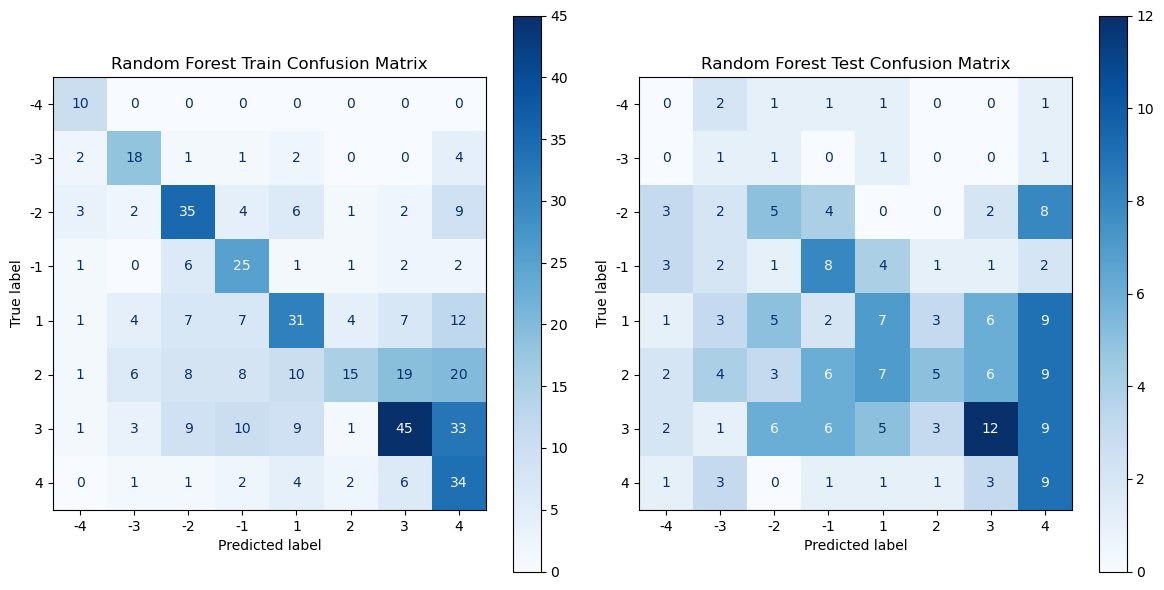

In [332]:
labels = [-4, -3, -2, -1, 1, 2, 3, 4]

# Confusion matrix for training data
train_matrix = confusion_matrix(y_train, rf_train_pred, labels=labels)

# Confusion matrix for test data
test_matrix = confusion_matrix(y_test, rf_test_preds, labels=labels)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_matrix, display_labels=labels)
disp_train.plot(cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_matrix, display_labels=labels)
disp_test.plot(cmap='Blues', ax=axes[1])
axes[1].set_title("Random Forest Test Confusion Matrix")

# Show the plot
plt.tight_layout()
plt.show()

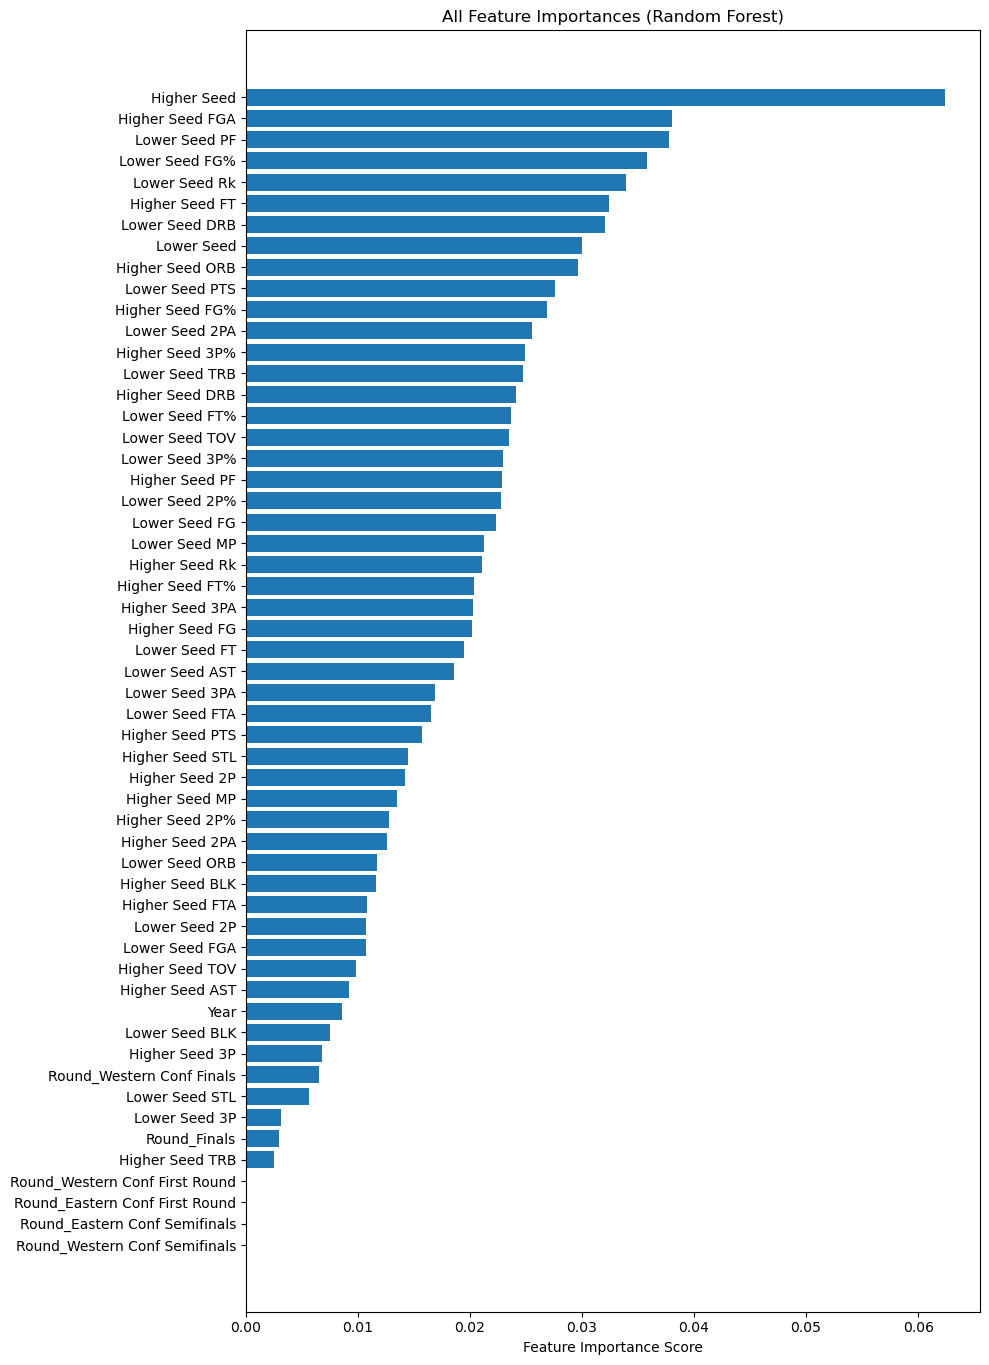

In [318]:
# Sort all indices by importance
sorted_idx = np.argsort(rf_importances)

plt.figure(figsize=(10, len(feature_names) * 0.25))  
plt.barh(range(len(sorted_idx)), rf_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.title('All Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [334]:
class_counts = pd.Series(y).value_counts().sort_index()
print(class_counts)

Net Wins
-4     16
-3     32
-2     86
-1     60
 1    109
 2    129
 3    155
 4     69
Name: count, dtype: int64
